<a href="https://colab.research.google.com/github/jeanLlanosGutierrez/PruebaDevops/blob/main/k_means_reactiva_per.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Declarar librerías

In [ ]:
#Manipulación de datos
import pandas as pd
import numpy as np

#Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

#Técnicas estadísticas
import statsmodels.api as sm

#Modelos analítcos
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.cluster import KMeans

#import pandas_profiling as pp
import warnings
import os
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
pwd

'/content'

### 2. Cargar los datos

In [ ]:
df =pd.read_excel('Empresas_Reactiva_Perú.xlsx')
df = pd.DataFrame(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71553 entries, 0 to 71552
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RUC              71553 non-null  float64
 1   NOMBRE_EMPRESA   71553 non-null  object 
 2   SECTOR           71553 non-null  object 
 3   BANCO            71553 non-null  object 
 4   MONTO_PRESTAMO   71553 non-null  float64
 5   FLG_1MM          71553 non-null  int64  
 6   MONTO_COBERTURA  71553 non-null  float64
 7   DEPARTAMENTO     71553 non-null  object 
dtypes: float64(3), int64(1), object(4)
memory usage: 4.4+ MB


In [ ]:
df.head(3)

,RUC,NOMBRE_EMPRESA,SECTOR,BANCO,MONTO_PRESTAMO,FLG_1MM,MONTO_COBERTURA,DEPARTAMENTO
0,2.052055e+10,1 ONE S.A.C.,COMERCIO,CRÉDITO,1894383.0,1,1704944.7,LIMA
1,2.054319e+10,1000 MILLAS SAC,COMERCIO,CRÉDITO,300570.0,0,270513.0,LIMA
2,2.037972e+10,100PRE FELIZ SAC,"AGRICULTUR, GANADERIA, CAZA Y SILVICULTURA",BANCO BBVA PERU,1370000.0,1,1233000.0,LIMA


In [ ]:
df.shape

(71553, 8)

In [ ]:
df1 = pd.read_excel('Income.xlsx')
df1 = pd.DataFrame(df1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71556 entries, 0 to 71555
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RUC     71553 non-null  float64
 1   INCOME  71553 non-null  float64
dtypes: float64(2)
memory usage: 1.1 MB


In [ ]:
df1.head(3)

,RUC,INCOME
0,2.052055e+10,5.903929e+08
1,2.054319e+10,9.367398e+07
2,2.037972e+10,1.701463e+07


In [ ]:
df2 = pd.merge(df, df1, on='RUC')

In [ ]:
df2.head(3)

,RUC,NOMBRE_EMPRESA,SECTOR,BANCO,MONTO_PRESTAMO,FLG_1MM,MONTO_COBERTURA,DEPARTAMENTO,INCOME
0,2.052055e+10,1 ONE S.A.C.,COMERCIO,CRÉDITO,1894383.0,1,1704944.7,LIMA,5.903929e+08
1,2.054319e+10,1000 MILLAS SAC,COMERCIO,CRÉDITO,300570.0,0,270513.0,LIMA,9.367398e+07
2,2.037972e+10,100PRE FELIZ SAC,"AGRICULTUR, GANADERIA, CAZA Y SILVICULTURA",BANCO BBVA PERU,1370000.0,1,1233000.0,LIMA,1.701463e+07


### 3. Exploración y selección de datos

In [ ]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [ ]:
df2.describe()

,RUC,MONTO_PRESTAMO,FLG_1MM,MONTO_COBERTURA,INCOME
count,71555.00,71555.00,71555.00,71555.00,71555.00
mean,18139283309.37,345873.84,0.07,302322.29,50467597.53
std,4317413281.14,1144352.80,0.25,939468.10,187540502.83
min,10000006209.00,500.00,0.00,490.00,1645.63
25%,20108847754.00,20330.50,0.00,19923.89,3750018.65
50%,20512027084.00,55000.00,0.00,52250.00,11071589.86
75%,20561283580.00,176434.00,0.00,167612.30,33664411.68
max,20606001419.00,10000000.00,1.00,8000000.00,7373652651.55


In [ ]:
#CREAMOS EL % DE COBERTURA:

df2['PORCENTAJE_COBERTURA'] = df2['MONTO_COBERTURA'] / df2['MONTO_PRESTAMO']

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71555 entries, 0 to 71554
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   RUC                   71555 non-null  float64
 1   NOMBRE_EMPRESA        71555 non-null  object 
 2   SECTOR                71555 non-null  object 
 3   BANCO                 71555 non-null  object 
 4   MONTO_PRESTAMO        71555 non-null  float64
 5   FLG_1MM               71555 non-null  int64  
 6   MONTO_COBERTURA       71555 non-null  float64
 7   DEPARTAMENTO          71555 non-null  object 
 8   INCOME                71555 non-null  float64
 9   PORCENTAJE_COBERTURA  71555 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 6.0+ MB


In [ ]:
df2.head(3)

,RUC,NOMBRE_EMPRESA,SECTOR,BANCO,MONTO_PRESTAMO,FLG_1MM,MONTO_COBERTURA,DEPARTAMENTO,INCOME,PORCENTAJE_COBERTURA
0,20520549740.00,1 ONE S.A.C.,COMERCIO,CRÉDITO,1894383.00,1,1704944.70,LIMA,590392875.16,0.90
1,20543190617.00,1000 MILLAS SAC,COMERCIO,CRÉDITO,300570.00,0,270513.00,LIMA,93673975.37,0.90
2,20379719440.00,100PRE FELIZ SAC,"AGRICULTUR, GANADERIA, CAZA Y SILVICULTURA",BANCO BBVA PERU,1370000.00,1,1233000.00,LIMA,17014629.00,0.90


In [ ]:
corr = df2[['MONTO_PRESTAMO','MONTO_COBERTURA','INCOME','PORCENTAJE_COBERTURA','FLG_1MM']].corr().round(4)
corr

,MONTO_PRESTAMO,MONTO_COBERTURA,INCOME,PORCENTAJE_COBERTURA,FLG_1MM
MONTO_PRESTAMO,1.00,1.00,0.56,-0.74,0.73
MONTO_COBERTURA,1.00,1.00,0.57,-0.74,0.76
INCOME,0.56,0.57,1.00,-0.48,0.46
PORCENTAJE_COBERTURA,-0.74,-0.74,-0.48,1.00,-0.61
FLG_1MM,0.73,0.76,0.46,-0.61,1.00


In [ ]:
X=np.array(df2[['PORCENTAJE_COBERTURA','MONTO_PRESTAMO','INCOME']])
X.shape

(71555, 3)

### 4. Modelado

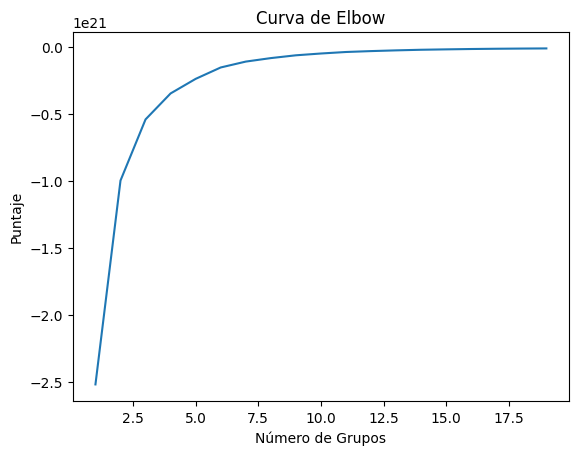

In [ ]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Número de Grupos')
plt.ylabel('Puntaje')
plt.title('Curva de Elbow')
plt.show()

In [ ]:
num_clusters = 4

In [ ]:
data=df2[['PORCENTAJE_COBERTURA','MONTO_PRESTAMO','INCOME']]

In [ ]:
#Segmentación de KMEANS

kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=10)
kmeans.fit(data)

KMeans(n_clusters=4, n_init=10)

In [ ]:
def form_cluster(x,k):
    no_clusters = k
    model = KMeans(n_clusters=no_clusters,init='random')
    model.fit(x)
    labels = model.labels_
    print(labels)

    # Cacluate the silhouette score
    sh_score = silhouette_score(x,labels)
    return sh_score

In [ ]:
prediction = kmeans.predict(data)

In [ ]:
prediction

array([0, 2, 2, ..., 2, 0, 2], dtype=int32)

In [ ]:
pronosseg = pd.DataFrame(prediction)

In [ ]:
pronosseg.columns=['Segmento']

In [ ]:
pronosseg.head(3)

,Segmento
0,0
1,2
2,2


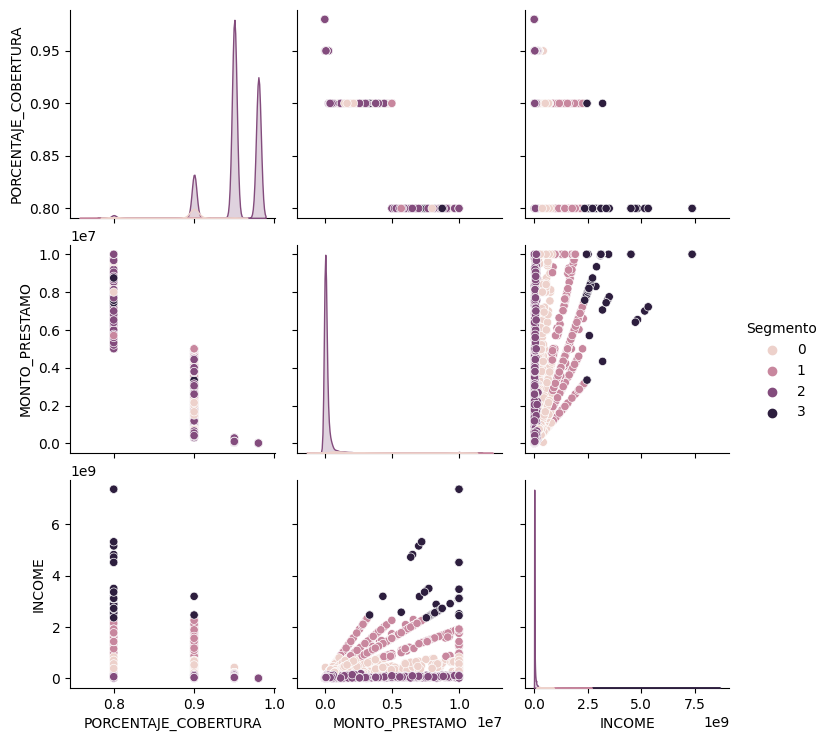

In [ ]:
sns.pairplot(pd.concat([data,pronosseg],axis=1), hue="Segmento")

In [ ]:
res1=pd.concat([data,pronosseg],axis=1).groupby(['Segmento']).mean()
res1.style.applymap(lambda x: 'background-color : yellow' if x>res1.iloc[0,0] else '')

,PORCENTAJE_COBERTURA,MONTO_PRESTAMO,INCOME
Segmento,,,
0,0.893907,1850980.269906,346892082.434581
1,0.862363,5350686.172829,1321159188.787853
2,0.954224,230219.192256,23427614.122556
3,0.803000,9180699.733750,3381509479.173045


In [ ]:
pronosseg.head()

,Segmento
0,0
1,2
2,2
3,2
4,2


In [ ]:
data_final=pd.concat([df2,pronosseg],axis=1)

In [ ]:
data_final.head(3)

,RUC,NOMBRE_EMPRESA,SECTOR,BANCO,MONTO_PRESTAMO,FLG_1MM,MONTO_COBERTURA,DEPARTAMENTO,INCOME,PORCENTAJE_COBERTURA,Segmento
0,20520549740.00,1 ONE S.A.C.,COMERCIO,CRÉDITO,1894383.00,1,1704944.70,LIMA,590392875.16,0.90,0
1,20543190617.00,1000 MILLAS SAC,COMERCIO,CRÉDITO,300570.00,0,270513.00,LIMA,93673975.37,0.90,2
2,20379719440.00,100PRE FELIZ SAC,"AGRICULTUR, GANADERIA, CAZA Y SILVICULTURA",BANCO BBVA PERU,1370000.00,1,1233000.00,LIMA,17014629.00,0.90,2


In [ ]:
#EXPORTAR BASE
data_final.to_csv("resultados_test_2.csv",index=False)